In [1]:
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import objectSelection
import getAxes
import calcProfiles

In [2]:
N = 500
cosmoDC2 = 'cosmoDC2_v1.1.4_small'
data, dt_cent, main_index = objectSelection.select_halos(cosmoDC2, N)

In [3]:
main_index = main_index.astype(int)

In [4]:
cylindrical_cut = objectSelection.lss_cyl_cut(dt_cent, main_index)
cluster_cut = objectSelection.cluster_cut(dt_cent, data, main_index)

In [5]:
cents_x = dt_cent['position_x']; cents_y=dt_cent['position_y']; cents_z = dt_cent['position_z']
x = data["position_x"]; y = data["position_y"]; z = data["position_z"]
ids = np.array(list(cylindrical_cut.keys()))

In [6]:
## setting up the dictionaries to store distance data
lss_x1_data = dict.fromkeys(ids)
lss_x2_data = dict.fromkeys(ids)

cl_x1_data = dict.fromkeys(ids)
cl_x2_data = dict.fromkeys(ids)

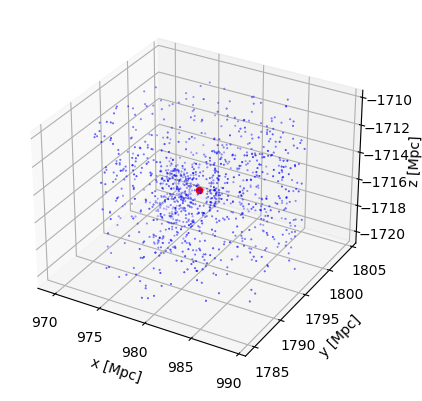

In [7]:
## plotting tests
nearby_halos_xy = cylindrical_cut[ids[0]]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]'); ax.set_zlabel('z [Mpc]')

ax.scatter(cents_x[nearby_halos_xy],cents_y[nearby_halos_xy],cents_z[nearby_halos_xy], marker='.', s=0.75, c='blue') #, c=s, vmin=10**14, vmax = 2*10**14)
ax.scatter(cents_x[np.where(dt_cent['halo_id'] == ids[0])], cents_y[np.where(dt_cent['halo_id'] == ids[0])], cents_z[np.where(dt_cent['halo_id'] == ids[0])], c='red')

#fig.colorbar(sct)
plt.savefig('xyz_nearby.png')
plt.show()

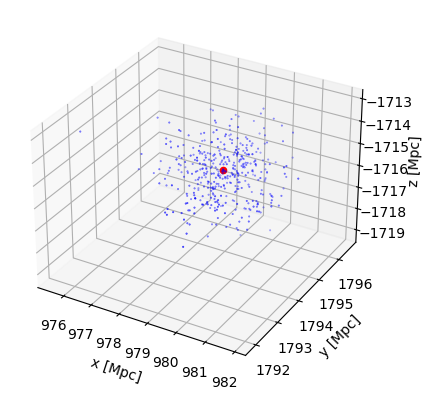

In [8]:
cluster_xy = cluster_cut[ids[0]]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]'); ax.set_zlabel('z [Mpc]')

ax.scatter(x[cluster_xy],y[cluster_xy],z[cluster_xy], marker='.', s=0.75, c='blue') #, c=s, vmin=10**14, vmax = 2*10**14)
ax.scatter(cents_x[np.where(dt_cent['halo_id'] == ids[0])], cents_y[np.where(dt_cent['halo_id'] == ids[0])], cents_z[np.where(dt_cent['halo_id'] == ids[0])], c='red')

#fig.colorbar(sct)
plt.savefig('xyz_cluster.png')
plt.show()

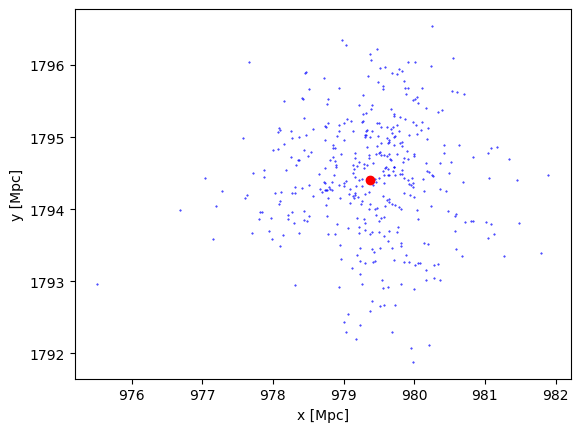

In [9]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]')

ax.scatter(x[cluster_xy],y[cluster_xy], marker='.', s=0.75, c='blue') #, c=s, vmin=10**14, vmax = 2*10**14)
ax.scatter(cents_x[np.where(dt_cent['halo_id'] == ids[0])], cents_y[np.where(dt_cent['halo_id'] == ids[0])], c='red')

#fig.colorbar(sct)
plt.savefig('xy_cluster.png')
plt.show()

In [ ]:
## calculating the axes for LSS
lss_maj = dict.fromkeys(ids)
lss_min = dict.fromkeys(ids)
cl_maj = dict.fromkeys(ids)
cl_min = dict.fromkeys(ids)

theta = 30
r_max = 10

for key in ids:
    # calculating central x, y
    cent_x =  cents_x[np.where(dt_cent['halo_id'] == key)]
    cent_y =  cents_y[np.where(dt_cent['halo_id'] == key)]
    
    # setting distances
    lss_x1_data[key] = cents_x[cylindrical_cut[key]] - cent_x
    lss_x2_data[key] = cents_y[cylindrical_cut[key]] - cent_y
    
    # getting the major, minor axis calculations
    major, minor = getAxes.get_axes(lss_x1_data[key], lss_x2_data[key])
    
    # getting the axis cuts
    lss_maj[key] = getAxes.get_axis_cut(major[1], lss_x1_data[key], lss_x2_data[key], theta, r_max)
    lss_min[key] = getAxes.get_axis_cut(minor[1], lss_x1_data[key], lss_x2_data[key], theta, r_max)

## calculating the axes for CL
for key in ids:
    # calculating central x, y
    cent_x =  cents_x[np.where(dt_cent['halo_id'] == key)]
    cent_y =  cents_y[np.where(dt_cent['halo_id'] == key)]
    
    # setting distances
    cl_x1_data[key] = x[cluster_cut[key]] - cent_x
    cl_x2_data[key] = y[cluster_cut[key]] - cent_y
    
    # getting the major, minor axis calculations
    major, minor = getAxes.get_axes(cl_x1_data[key], cl_x2_data[key])
    
    # getting the axis cuts
    cl_maj[key] = getAxes.get_axis_cut(major[1], cl_x1_data[key], cl_x2_data[key], theta, r_max)
    cl_min[key] = getAxes.get_axis_cut(minor[1], cl_x1_data[key], cl_x2_data[key], theta, r_max)

/global/u1/d/dericj/triaxiality-clusters/getAxes.py:45: RuntimeWarning: invalid value encountered in divide
  th = np.arctan(x2 / x1)
/global/u1/d/dericj/triaxiality-clusters/getAxes.py:45: RuntimeWarning: divide by zero encountered in divide
  th = np.arctan(x2 / x1)


In [ ]:
# testing it for the first id
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(5); fig.set_figheight(5)

x_min = np.min(lss_x1_data[ids[0]]); y_min = np.min(lss_x2_data[ids[0]])
x_max = np.max(lss_x1_data[ids[0]]); y_max = np.max(lss_x2_data[ids[0]])

# xy
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]')
ax.scatter(lss_x1_data[ids[0]],lss_x2_data[ids[0]], marker='o', s=1, c='grey', label='All Halos')
ax.scatter(lss_x1_data[ids[0]][lss_maj[ids[0]]], lss_x2_data[ids[0]][lss_maj[ids[0]]], marker='.', s=0.75, c='red', label='Major Axis')
ax.scatter(lss_x1_data[ids[0]][lss_min[ids[0]]], lss_x2_data[ids[0]][lss_min[ids[0]]], marker='.', s=0.75, c='blue', label='Minor Axis')
# ax.plot([-maj_xy1[1][0]*x_max,maj_xy1[1][0]*maj_xy1[0]*x_max], [-maj_xy1[1][1]*y_max,maj_xy1[1][1]*y_max], '--', color='red')
# ax.plot([-min_xy1[1][0]*min_xy1[0]*x_max,min_xy1[1][0]*min_xy1[0]*x_max], [-min_xy1[1][1]*min_xy1[0]*y_max,min_xy1[1][1]*min_xy1[0]*y_max], '--', color='blue')

plt.legend()
plt.savefig('N_cluster_test.png')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(5); fig.set_figheight(5)

x_min = np.min(cl_x1_data[ids[0]]); y_min = np.min(cl_x2_data[ids[0]])
x_max = np.max(cl_x1_data[ids[0]]); y_max = np.max(cl_x2_data[ids[0]])

# xy
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]')
ax.scatter(cl_x1_data[ids[0]],cl_x2_data[ids[0]], marker='o', s=1, c='grey', label='All Halos')
ax.scatter(cl_x1_data[ids[0]][cl_maj[ids[0]]], cl_x2_data[ids[0]][cl_maj[ids[0]]], marker='.', s=0.75, c='red', label='Major Axis')
ax.scatter(cl_x1_data[ids[0]][cl_min[ids[0]]], cl_x2_data[ids[0]][cl_min[ids[0]]], marker='.', s=0.75, c='blue', label='Minor Axis')

plt.legend()
plt.savefig('N_cluster_test.png')
plt.show()

In [ ]:
## stacking the axes
maj_stack_x1, maj_stack_x2, min_stack_x1, min_stack_x2, fll_stack_x1, fll_stack_x2 = getAxes.stack_axes(lss_x1_data, lss_x2_data, lss_maj, lss_min)
cl_maj_x1, cl_maj_x2, cl_min_x1, cl_min_x2, cl_fll_x1, cl_fll_x2 = getAxes.stack_axes(cl_x1_data, cl_x2_data, cl_maj, cl_min)

In [ ]:
## calculating profiles
lss_fll_dens, lss_fll_delta, lss_bins_fll = calcProfiles.n_calcs(fll_stack_x1, fll_stack_x2, theta)
lss_maj_dens, lss_maj_delta, lss_bins_maj = calcProfiles.n_calcs(maj_stack_x1, maj_stack_x2, theta)
lss_min_dens, lss_min_delta, lss_bins_min = calcProfiles.n_calcs(min_stack_x1, min_stack_x2, theta)

cl_fll_dens, cl_fll_delta, cl_bins_fll = calcProfiles.n_calcs(cl_fll_x1, cl_fll_x2, theta)
cl_maj_dens, cl_maj_delta, cl_bins_maj = calcProfiles.n_calcs(cl_maj_x1, cl_maj_x2, theta)
cl_min_dens, cl_min_delta, cl_bins_min = calcProfiles.n_calcs(cl_min_x1, cl_min_x2, theta)

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['font.family'] ='serif'
ax.set_xlabel('$R$ [Mpc]')
ax.set_ylabel('Density Count, $n$')

ax.scatter(lss_bins_fll[1:], lss_fll_dens, c='black', label='Full')
ax.scatter(lss_bins_fll[1:], lss_maj_dens, c='red', label='Major Axis')
ax.scatter(lss_bins_fll[1:], lss_min_dens, c='blue', label='Minor Axis')
ax.set_xscale('log')
#ax.plot(, dN_min/dN, c='blue', label='Minor Axis')
#ax.set_xscale('log')

ax.grid('on')
#ax.set_ylim(0, 0.7)

plt.legend()
plt.savefig("lss_density_count.png")
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['font.family'] ='serif'
ax.set_xlabel('$R$ [Mpc]')
ax.set_ylabel('$\Delta n$')

ax.scatter(lss_bins_fll[1:-1], lss_fll_delta, c='black', label='Full')
ax.scatter(lss_bins_fll[1:-1], lss_maj_delta, c='red', label='Major Axis')
ax.scatter(lss_bins_fll[1:-1], lss_min_delta, c='blue', label='Minor Axis')
ax.set_xscale('log')
#ax.plot(, dN_min/dN, c='blue', label='Minor Axis')
#ax.set_xscale('log')

ax.grid('on')
#ax.set_ylim(0, 0.7)

plt.legend()
plt.savefig("lss_delta_dens.png")
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['font.family'] ='serif'
ax.set_xlabel('$R$ [Mpc]')
ax.set_ylabel('Density Count, $n$')

ax.scatter(cl_bins_fll[1:], cl_fll_dens, c='black', label='Full')
ax.scatter(cl_bins_fll[1:], cl_maj_dens, c='red', label='Major Axis')
ax.scatter(cl_bins_fll[1:], cl_min_dens, c='blue', label='Minor Axis')
ax.set_xscale('log')
#ax.plot(, dN_min/dN, c='blue', label='Minor Axis')
#ax.set_xscale('log')

ax.grid('on')
#ax.set_ylim(0, 0.7)

plt.legend()
plt.savefig("cl_density_count.png")
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['font.family'] ='serif'
ax.set_xlabel('$R$ [Mpc]')
ax.set_ylabel('$\Delta n$')

ax.scatter(cl_bins_fll[1:-1], cl_fll_delta, c='black', label='Full')
ax.scatter(cl_bins_fll[1:-1], cl_maj_delta, c='red', label='Major Axis')
ax.scatter(cl_bins_fll[1:-1], cl_min_delta, c='blue', label='Minor Axis')
ax.set_xscale('log')
#ax.plot(, dN_min/dN, c='blue', label='Minor Axis')
#ax.set_xscale('log')

ax.grid('on')
#ax.set_ylim(0, 0.7)

plt.legend()
plt.savefig("cl_delta_dens.png")
plt.show()

In [ ]:
## do the ratio
fig, ax = plt.subplots()
plt.rcParams['font.family'] ='serif'
ax.set_xlabel('$R$ [Mpc]')
ax.set_ylabel('$\Delta n$')

#ax.scatter(cl_bins_fll[1:-1], cl_fll_delta, c='black', label='Full')
ax.scatter(cl_bins_fll[1:-1], cl_maj_delta / cl_fll_delta, c='red', label='Major Axis')
ax.scatter(cl_bins_fll[1:-1], cl_min_delta / cl_fll_delta, c='blue', label='Minor Axis')
ax.set_xscale('log')
#ax.plot(, dN_min/dN, c='blue', label='Minor Axis')
#ax.set_xscale('log')

ax.grid('on')
#ax.set_ylim(0, 0.7)

plt.legend()
plt.savefig("ratio_delta_dens.png")
plt.show()